In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def data_gen(N=100, mu=0, sigma=.4, xstart=0, xend=1):
    x = np.linspace(xstart,xend,N)
    m, c = .5, 2    
    y = m * x + c + np.random.normal(mu, sigma, N)

    return x,y

In [6]:
def reg_line(x, y):
    least = False
    mP = -10
    cP = -5
    m = 0
    c = 0
    err1 = 10000
    while(least == False):
        i = 0
        err = 0
        while(i < 10):
            err += np.power((y[i] - (mP*x[i]) - cP), 2)
            i = i + 1
            
        #print(err)
        if(err < err1):
            err1 = err
            m = mP
            c = cP
        if(mP == 5 and cP == 5):
            least = True
        elif(mP == 5):
            cP = cP + 1
        else:
            mP = mP + 0.5
    return m, c, err1

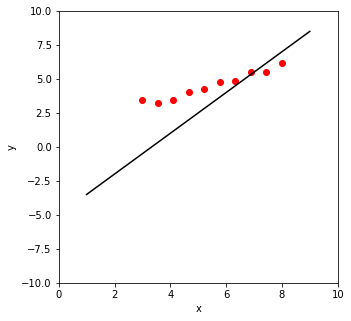

In [7]:
x, y = data_gen(N=10, xstart=3, xend=8)

m, c, err = reg_line(x, y)

a = np.linspace(1, 9, 10)
b = (m * a) + c

fig = plt.figure()
plt.figure(figsize=(5,5))
plt.plot(x,y,'ro')
plt.plot(a,b,'k-')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,10])
plt.ylim([-10,10])
plt.savefig('temp.png', dpi=fig.dpi)

In [8]:
def im_rotate(img, angle_in_degrees):
    pass
    # Should return the rotated image.
    
    angle = (angle_in_degrees * np.pi)/180
    COS = np.cos(angle)
    SIN = np.sin(angle)
    R = np.matrix([[COS, -SIN], [SIN, COS]])
    c, d = img.shape
    print(img.shape)
    
    img_r = [[0 for e in range(c)]for f in range(d)]
    for i in range(1, c):
        for j in range(1, d):            
            temp = np.dot(R,[i, j])
            xP = abs(int(temp.item(0, 0)))
            yP = abs(int(temp.item(0, 1)))
            img_r[xP][yP] = img[i, j]
            
    return img_r

(334, 500)


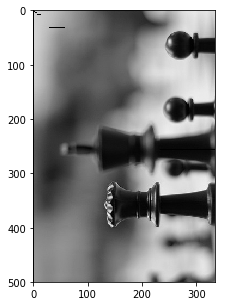

In [9]:
import cv2
img = cv2.imread('focus.jpg', 0) # Load in grayscale

img_R = im_rotate(img, 90)


plt.figure(figsize=(5,5))
plt.imshow(img_R, 'gray')